# Homework Part I

1. I have a drug group and a placebo group. I want some quantitative confirmation to see if they produce the ***same*** or ***different*** outcomes: `drug-A` and `placebo-A`.

2. I have a drug group and a placebo group: `drug-B` and `placebo-B`. The mean outcome is ***lower*** in the placebo group and I have a theory that may explain this, but I first need to rule out the possibility that the lower outcome is just due to chance.

In each case construct (i.e. actually write down) your two hypotheses, decide from how they are worded, whether they are one-tailed or two-tailed, then use statistical tests to assess which you should accept.

Hints:

* Test data sets for normality (are they pretty, do they have a normal distribution?). Use the test we have not used yet, the D’Agostino & Pearson test to provide probabilities of normality (prettiness).

* Test whether means differ significantly: When testing if means are different, you should use use either a two-tailed Mann-Whitney p-value, or a two-tailed T-test p-value, depending on the result of the normality test. Remember that `scipy.stats`'s `Mann-Whitney` function returns a one-tailed p-value.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import csv

In [28]:
# Read in the records.
drug_A = np.recfromcsv("data/drug-A.csv") 
drug_B = np.recfromcsv("data/drug-B.csv") 
placebo_A = np.recfromcsv("data/placebo-A.csv")
placebo_B= np.recfromcsv("data/placebo-B.csv")

In [29]:
with open ('data/drug-A.csv') as drugA_csv:
    drug_A = np.array([row[0] for row in csv.reader(drugA_csv)]).astype(np.float)
with open ('data/drug-B.csv') as drugA_csv:
    drug_B = np.array([row[0] for row in csv.reader(drugA_csv)]).astype(np.float)
with open ('data/placebo-A.csv') as drugA_csv:
    placebo_A = np.array([row[0] for row in csv.reader(drugA_csv)]).astype(np.float)
with open ('data/placebo-B.csv') as drugA_csv:
    placebo_B = np.array([row[0] for row in csv.reader(drugA_csv)]).astype(np.float)

# 1.

First, we need to judge if these two data set is normally distributed.
So, we need to use the D’Agostino & Pearson test verify my mind.

In [42]:
from scipy.stats import normaltest

Skew =  1.287411721043734 p-value=  0.5253419681562425
H0 - drug_A come from a normal distribution: 
Accept H0,drug_A come from a normal distribution


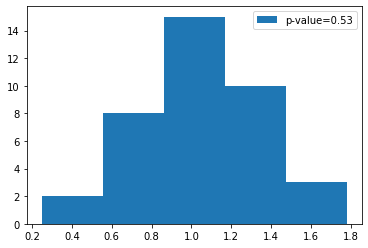

In [50]:
# drug_A 
k2, p = normaltest(drug_A)
print ("Skew = ", k2,"p-value= ", p)
print ("H0 - drug_A come from a normal distribution: ")
if p<0.05:
    print ("Reject H0,drug_A doesn't come from a normal distribution.")
else:
    print ("Accept H0,drug_A come from a normal distribution")
plt.hist(drug_A, bins=5)
plt.legend(("p-value=%.2g"%p, ))

Skew =  1.2202628948918977 p-value=  0.5432794516844254
H0 - placebo_A come from a normal distribution: 
Accept H0,placebo_A come from a normal distribution


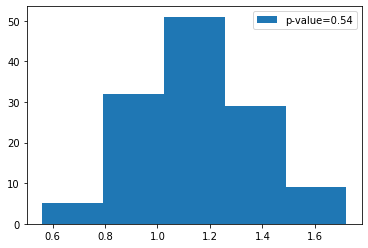

In [51]:
# placebo_A 
k2, p = normaltest(placebo_A)
print ("Skew = ", k2,"p-value= ", p)
print ("H0 - placebo_A come from a normal distribution: ")
if p<0.05:
    print ("Reject H0,placebo_A doesn't come from a normal distribution.")
else:
    print ("Accept H0,placebo_A come from a normal distribution")
plt.hist(placebo_A, bins=5)
plt.legend(("p-value=%.2g"%p, ))

According to the normal test above, we can assume that both placebo A and drug A is distributed normally.

## Now, I can give my hypothesis
H0:The drug group and the placebo group produce the same outcome

H1:The drug group and the placebo group produce the different outcome

In [56]:
# Null hypothesis: 2 independent samples have identical average (expected) values values.
from scipy.stats import ttest_ind
ttest_ind(drug_A,placebo_A,equal_var=False)


Ttest_indResult(statistic=-1.7473607598380747, pvalue=0.08686705804164516)

The test measures whether the average (expected) value differs significantly across samples. 
If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores.
If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%,then we reject the null hypothesis of equal averages.

In [61]:
stats.t.ppf(q=0.05,  # Quantile to check
            df=38)  # Degrees of freedom

-1.6859544576438146

### Conclusion:  Here we see that our test statistic of 1.74 is out of the quantile of the t-distribution (1.68), so we should reject the null hypothesis------The drug group and the placebo group produce the different outcome.

# 2.I have a drug group and a placebo group: drug-B and placebo-B. The mean outcome is lower in the placebo group and I have a theory that may explain this, but I first need to rule out the possibility that the lower outcome is just due to chance.

## Hypotheses

We formulate two hypotheses:
The *null hypothesis* (H0):

> *There is no difference in mean outcome in the placebo group and the drug group *

...and an *alternative hypothesis* (H1):

> *The  mean outcome in the placebo group is lower than ean outcome in the drug group.*

Only accept H1 if it is very unlikely that H0 can explain our observations - otherwise reject H1.

First, we need to judge if these two data set is normally distributed.
So, we need to use the D’Agostino & Pearson test verify my mind.

Skew =  20.701784062790804 p-value=  3.19642639296486e-05
H0 - drug_B come from a normal distribution: 
Reject H0,drug_B doesn't come from a normal distribution.


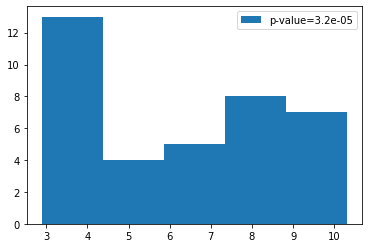

In [68]:
# drug_B 
k2, p = normaltest(drug_B)
print ("Skew = ", k2,"p-value= ", p)
print ("H0 - drug_B come from a normal distribution: ")
if p<0.05:
    print ("Reject H0,drug_B doesn't come from a normal distribution.")
else:
    print ("Accept H0,drug_B come from a normal distribution")
plt.hist(drug_B, bins=5)
plt.legend(("p-value=%.2g"%p, ))

Skew =  2.0203883984723765 p-value=  0.36414825539139845
H0 - placebo_B come from a normal distribution: 
Accept H0,placebo_B come from a normal distribution


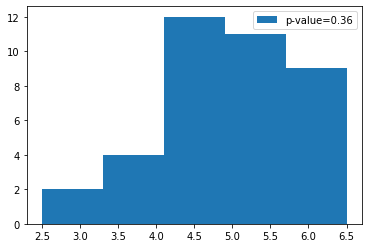

In [69]:
# placebo_B 
k2, p = normaltest(placebo_B)
print ("Skew = ", k2,"p-value= ", p)
print ("H0 - placebo_B come from a normal distribution: ")
if p<0.05:
    print ("Reject H0,placebo_B doesn't come from a normal distribution.")
else:
    print ("Accept H0,placebo_B come from a normal distribution")
plt.hist(placebo_B, bins=5)
plt.legend(("p-value=%.2g"%p, ))

### According to the analysis above, we can know that the drug B is not distributed normally but the placebo B is. As a result, I will use the Mann-Whitney U test to verify my hypothesis.

In [87]:
stats.mannwhitneyu(placebo_B,drug_B, alternative="less")

MannwhitneyuResult(statistic=512.5, pvalue=0.021983043515195907)

Because the pvalue 0.02 is less than 0.05, so we can reject the null hypothese.

### Conclusion:The mean outcome in the placebo group is lower than ean outcome in the drug group.